In [1]:
%load_ext autoreload
%autoreload 5

In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from weight_lifting import WeightLifting

In [319]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO (MINIMO DE ALTERACOES POSSIVEIS NOS DADOS)

Model: LR
Accuracy: 0.9821
F1: 0.9673
Precision: 0.9633
Recall: 0.9719

[[322   3   0   0   0]
 [  6 209   3   0   0]
 [  0   1  25   0   0]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       325
           B       0.98      0.96      0.97       218
           C       0.89      0.96      0.93        26
           D       0.97      0.95      0.96        65
           E       0.99      0.99      0.99       372

    accuracy                           0.98      1006
   macro avg       0.96      0.97      0.97      1006
weighted avg       0.98      0.98      0.98      1006




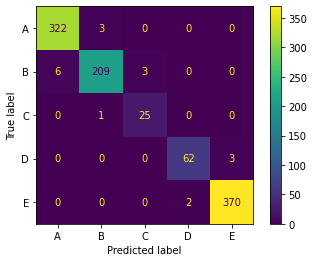

--------------------------------------------
Model: SVM
Accuracy: 0.6988
F1: 0.621
Precision: 0.855
Recall: 0.558

[[204  10   1   0 110]
 [ 14  98   0   0 106]
 [  0   1  11   0  14]
 [  0   0   0  19  46]
 [  0   0   0   1 371]]

              precision    recall  f1-score   support

           A       0.94      0.63      0.75       325
           B       0.90      0.45      0.60       218
           C       0.92      0.42      0.58        26
           D       0.95      0.29      0.45        65
           E       0.57      1.00      0.73       372

    accuracy                           0.70      1006
   macro avg       0.85      0.56      0.62      1006
weighted avg       0.79      0.70      0.69      1006




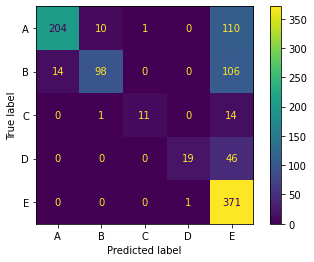

--------------------------------------------
Model: MPL
Accuracy: 0.3698
F1: 0.108
Precision: 0.074
Recall: 0.2

[[  0   0   0   0 325]
 [  0   0   0   0 218]
 [  0   0   0   0  26]
 [  0   0   0   0  65]
 [  0   0   0   0 372]]

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       325
           B       0.00      0.00      0.00       218
           C       0.00      0.00      0.00        26
           D       0.00      0.00      0.00        65
           E       0.37      1.00      0.54       372

    accuracy                           0.37      1006
   macro avg       0.07      0.20      0.11      1006
weighted avg       0.14      0.37      0.20      1006




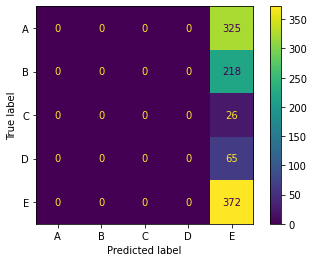

--------------------------------------------


In [23]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test)
engine.plot_results(base_padrao_predict, X_test, y_test)

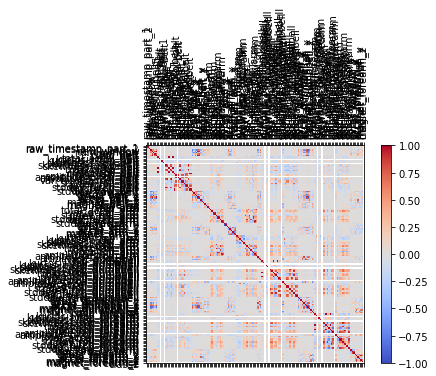

In [8]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [41]:
from sklearn.ensemble import IsolationForest


# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
predict = iso.fit_predict(X_train)

mask = predict != -1

X_train, y_train = X_train.iloc[mask], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(2199, 156) (2199, 1)


Model: LR
Accuracy: 0.8529
F1: 0.8922
Precision: 0.8994
Recall: 0.9108

[[323   2   0   0   0]
 [  3 213   2   0   0]
 [  0   0  26   0   0]
 [  0   0   0  62   3]
 [126   5   0   7 234]]

              precision    recall  f1-score   support

           A       0.71      0.99      0.83       325
           B       0.97      0.98      0.97       218
           C       0.93      1.00      0.96        26
           D       0.90      0.95      0.93        65
           E       0.99      0.63      0.77       372

    accuracy                           0.85      1006
   macro avg       0.90      0.91      0.89      1006
weighted avg       0.89      0.85      0.85      1006




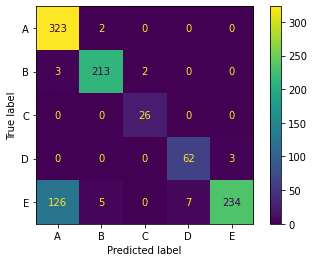

--------------------------------------------
Model: SVM
Accuracy: 0.4732
F1: 0.4676
Precision: 0.8245
Recall: 0.4426

[[314  10   1   0   0]
 [125  93   0   0   0]
 [ 15   0  11   0   0]
 [ 45   0   0  19   1]
 [332   0   0   1  39]]

              precision    recall  f1-score   support

           A       0.38      0.97      0.54       325
           B       0.90      0.43      0.58       218
           C       0.92      0.42      0.58        26
           D       0.95      0.29      0.45        65
           E       0.97      0.10      0.19       372

    accuracy                           0.47      1006
   macro avg       0.82      0.44      0.47      1006
weighted avg       0.76      0.47      0.41      1006




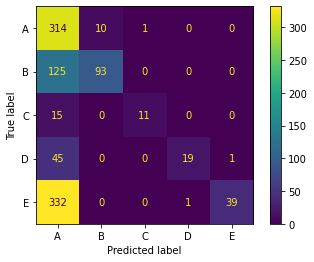

--------------------------------------------
Model: MPL
Accuracy: 0.3231
F1: 0.0977
Precision: 0.0646
Recall: 0.2

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score   support

           A       0.32      1.00      0.49       325
           B       0.00      0.00      0.00       218
           C       0.00      0.00      0.00        26
           D       0.00      0.00      0.00        65
           E       0.00      0.00      0.00       372

    accuracy                           0.32      1006
   macro avg       0.06      0.20      0.10      1006
weighted avg       0.10      0.32      0.16      1006




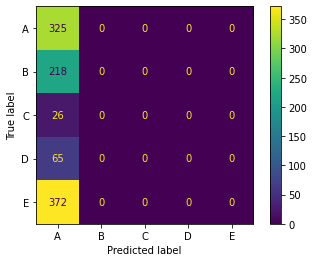

--------------------------------------------


In [42]:
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test)
engine.plot_results(base_padrao_predict, X_test, y_test)

(3018, 156) (3018, 1)
(2987, 156) (2987, 1)
Model: LR
Accuracy: 0.9751
F1: 0.9606
Precision: 0.9584
Recall: 0.9631

[[322   3   0   0   0]
 [  7 208   3   0   0]
 [  1   1  24   0   0]
 [  0   0   0  63   2]
 [  6   0   0   2 364]]

              precision    recall  f1-score   support

           A       0.96      0.99      0.97       325
           B       0.98      0.95      0.97       218
           C       0.89      0.92      0.91        26
           D       0.97      0.97      0.97        65
           E       0.99      0.98      0.99       372

    accuracy                           0.98      1006
   macro avg       0.96      0.96      0.96      1006
weighted avg       0.98      0.98      0.98      1006




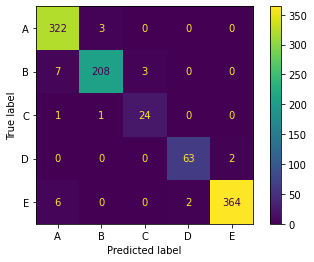

--------------------------------------------
Model: SVM
Accuracy: 0.6988
F1: 0.621
Precision: 0.855
Recall: 0.558

[[204  10   1   0 110]
 [ 14  98   0   0 106]
 [  0   1  11   0  14]
 [  0   0   0  19  46]
 [  0   0   0   1 371]]

              precision    recall  f1-score   support

           A       0.94      0.63      0.75       325
           B       0.90      0.45      0.60       218
           C       0.92      0.42      0.58        26
           D       0.95      0.29      0.45        65
           E       0.57      1.00      0.73       372

    accuracy                           0.70      1006
   macro avg       0.85      0.56      0.62      1006
weighted avg       0.79      0.70      0.69      1006




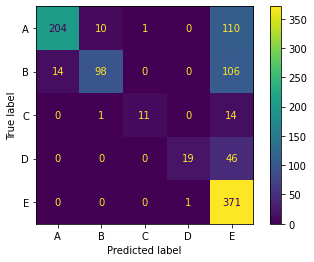

--------------------------------------------
Model: MPL
Accuracy: 0.3231
F1: 0.0977
Precision: 0.0646
Recall: 0.2

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score   support

           A       0.32      1.00      0.49       325
           B       0.00      0.00      0.00       218
           C       0.00      0.00      0.00        26
           D       0.00      0.00      0.00        65
           E       0.00      0.00      0.00       372

    accuracy                           0.32      1006
   macro avg       0.06      0.20      0.10      1006
weighted avg       0.10      0.32      0.16      1006




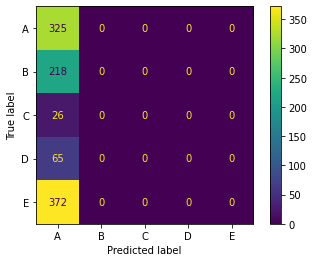

--------------------------------------------


In [50]:
# evaluate model performance with outliers removed using elliptical envelope
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# load the dataset
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
predict = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = predict != -1

X_train, y_train = X_train.iloc[mask], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)


base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test)
engine.plot_results(base_padrao_predict, X_test, y_test)

(3018, 156) (3018, 1)
(2994, 156) (2994, 1)
Model: LR
Accuracy: 0.9791
F1: 0.9507
Precision: 0.9505
Recall: 0.9511

[[323   2   0   0   0]
 [  6 208   4   0   0]
 [  2   2  22   0   0]
 [  0   0   0  63   2]
 [  0   0   0   3 369]]

              precision    recall  f1-score   support

           A       0.98      0.99      0.98       325
           B       0.98      0.95      0.97       218
           C       0.85      0.85      0.85        26
           D       0.95      0.97      0.96        65
           E       0.99      0.99      0.99       372

    accuracy                           0.98      1006
   macro avg       0.95      0.95      0.95      1006
weighted avg       0.98      0.98      0.98      1006




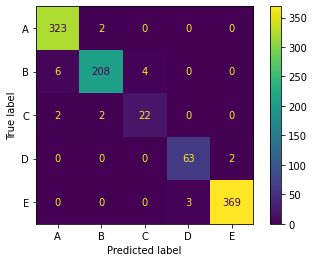

--------------------------------------------
Model: SVM
Accuracy: 0.6988
F1: 0.621
Precision: 0.855
Recall: 0.558

[[204  10   1   0 110]
 [ 14  98   0   0 106]
 [  0   1  11   0  14]
 [  0   0   0  19  46]
 [  0   0   0   1 371]]

              precision    recall  f1-score   support

           A       0.94      0.63      0.75       325
           B       0.90      0.45      0.60       218
           C       0.92      0.42      0.58        26
           D       0.95      0.29      0.45        65
           E       0.57      1.00      0.73       372

    accuracy                           0.70      1006
   macro avg       0.85      0.56      0.62      1006
weighted avg       0.79      0.70      0.69      1006




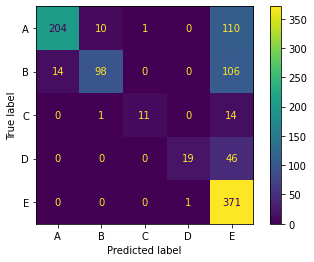

--------------------------------------------
Model: MPL
Accuracy: 0.3231
F1: 0.0977
Precision: 0.0646
Recall: 0.2

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score   support

           A       0.32      1.00      0.49       325
           B       0.00      0.00      0.00       218
           C       0.00      0.00      0.00        26
           D       0.00      0.00      0.00        65
           E       0.00      0.00      0.00       372

    accuracy                           0.32      1006
   macro avg       0.06      0.20      0.10      1006
weighted avg       0.10      0.32      0.16      1006




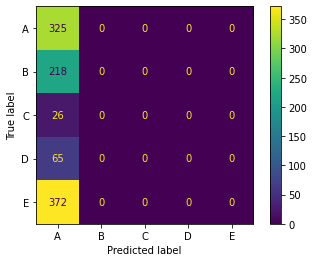

--------------------------------------------


In [52]:
# evaluate model performance with outliers removed using elliptical envelope
from sklearn.neighbors import LocalOutlierFactor

# load the dataset
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
predict = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = predict != -1

X_train, y_train = X_train.iloc[mask], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)


base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test)
engine.plot_results(base_padrao_predict, X_test, y_test)